# Assignment A01.2b Degree Distributions
*For the same networks, compute and plot the degree distribution*

1. Select axis scales (lin-lin/ lin-log/ log-log) that allow you to visualize better the distributions.
2. **Remember to bin the data accordingly to the scales selected**

*Test Datasets*
- Zachary karate Club
- NetSci collaborations
- Facebook friendships


In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

# Read and declare the class of graph data from gml files
g_karate = nx.read_gml("data/graph_karate.gml")
g_netsci = nx.read_gml("data/graph_netsci.gml")
g_facebook = nx.read_gml("data/graph_facebook.gml")

## Define Class and Method for the assignment A01.2b

**find_bin_arg.lin**

- Input : class graph / the start of # of bins
- Output : the proper # of bins for the graph / kinds of k / # of kinds of k / # of non-zero values in the histogram of the graph.

**find_bin_arg.logspace**

- Input : class graph / the start of # of bins
- Output : Logspace with the proper # of bins for the graph / kinds of k / # of kinds of k / # of non-zero values in the histogram of the graph.

*the proper # of bins...*

*Using too many bins will give you holes in your histogram, using too few will lose too much detail, like looking at a low resolution image*

In [2]:
class find_bin_arg():

    sort_k = 0
    num_sort_k = 0
    num_bar_hist = 0

    def lin (g, start_bins = 2):

        g_degrees = g.degree()
        g_k_list = [g_degrees[i] for i in g.nodes()]

        num_bins = start_bins

        while True:
            try:
                print (
                '....Processing...',
                'the # of bins:',  num_bins, end = '\r'
                )
                
                g_bins = num_bins
                _ = np.histogram(g_k_list, bins=g_bins, density = True)

                sort_k = set(g_k_list)
                num_sort_k = len(sort_k)
                num_bar_hist = np.count_nonzero(_[0])
                
                if num_sort_k <= num_bar_hist:
                    break
                else:
                    num_bins = num_bins + 1
            
            except KeyboardInterrupt:
                print('')
                print('Program interrupted by user')
                break

        return (g_bins, list(sort_k), num_sort_k, num_bar_hist)




    def log (g, start_bins = 2):

        g_degrees = g.degree()
        g_k_list = [g_degrees[i] for i in g.nodes()]
        
        log_start = np.log10(min(g_k_list))
        log_end = np.log10(max(g_k_list)+1)

        num_bins = start_bins

        while True:
            try:
                print (
                '....Processing...',
                'the # of bins:',  num_bins, end = '\r'
                )
                
                g_bins = np.logspace(log_start, log_end, num_bins)
                _ = np.histogram(g_k_list, bins=g_bins, density = True)

                sort_k = set(g_k_list)
                num_sort_k = len(sort_k)
                num_bar_hist = np.count_nonzero(_[0])
                
                if num_sort_k <= num_bar_hist:
                    break
                else:
                    num_bins = num_bins + 1
            
            except KeyboardInterrupt:
                print('')
                print('Program interrupted by user')
                break
        
        return (g_bins, list(sort_k), num_sort_k, num_bar_hist)


# 1. Using 'Zachary karate club' Dataset.

In [3]:
# Find the Dict degree of the network and create the List of degrees.
g_karate_degrees = g_karate.degree()
g_karate_k_list = [g_karate_degrees[i] for i in g_karate.nodes()]

## **Answer : log-log scale with bins = logspace (# of bins = 26)**

the kinds of k...   1, 2, 3...12, 16, 17
the num of kinds of k... 11
the num of bar in the histogram... 11
-------- Bin info ---------
the number of bins : 26
1.0, 1.1175828064975943, 1.2489913293790396, 1.3958512351785883, 1.5599793408640203...


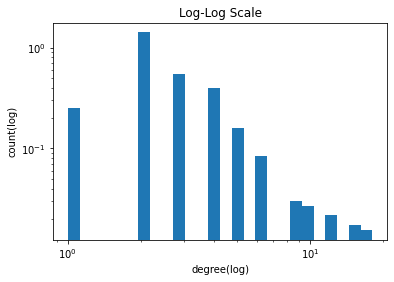

In [4]:
result = find_bin_arg.log(g_karate, 2)

g_karate_bins = result[0]
sort_karate_k = result[1]
num_sort_karate_k = result[2]
num_bar_karate_hist = result[3]

print('the kinds of k...   ', end='')
print(*sort_karate_k[:3], sep=", ", end = '')
print('...', end='')
print(*sort_karate_k[-3:], sep=", ")
print('the num of kinds of k...', num_sort_karate_k)
print('the num of bar in the histogram...', num_bar_karate_hist)

_ = plt.hist(g_karate_k_list, bins=g_karate_bins, density = True)

plt.title('Log-Log Scale')

plt.xscale('log')
plt.yscale('log')

plt.xlabel('degree(log)')
plt.ylabel('count(log)')

print ('-------- Bin info ---------')
print ('the number of bins :', len(g_karate_bins)-1)
print (*_[1][:5], sep = ', ', end ='')
print ('...')


# 2. Using 'NetSci collaborations' Dataset.

In [5]:
# Find the Dict degree of the network and create the List of degrees.
g_netsci_degrees = g_netsci.degree()
g_netsci_k_list = [g_netsci_degrees[i] for i in g_netsci.nodes()]

## **Answer : log-log scale with bins = logspace (# of bins = 55)**

the kinds of k...   1, 2, 3, 4, 5...19, 20, 21, 27, 34
the num of kinds of k... 22
the num of bar in the histogram... 22
-------- Bin info ---------
the number of bins : 55
1.0, 1.0667777880698501, 1.1380148491192024, 1.214008963534027, 1.2950777968158007...


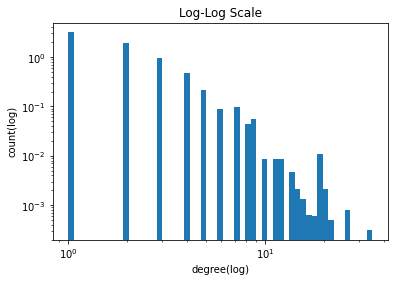

In [6]:
result = find_bin_arg.log(g_netsci, 2)

g_netsci_bins = result[0]
sort_netsci_k = result[1]
num_sort_netsci_k = result[2]
num_bar_netsci_hist = result[3]

print('the kinds of k...   ', end='')
print(*sort_netsci_k[:5], sep=", ", end = '')
print('...', end='')
print(*sort_netsci_k[-5:], sep=", ")
print('the num of kinds of k...', num_sort_netsci_k)
print('the num of bar in the histogram...', num_bar_netsci_hist)

_ = plt.hist(g_netsci_k_list, bins=g_netsci_bins, density = True)

plt.title('Log-Log Scale')

plt.xscale('log')
plt.yscale('log')

plt.xlabel('degree(log)')
plt.ylabel('count(log)')

print ('-------- Bin info ---------')
print ('the number of bins :', len(g_netsci_bins)-1)
print (*_[1][:5], sep = ', ', end ='')
print ('...')


# 3. Using 'Facebook friendship' Dataset.

In [7]:
# Find the Dict degree of the network and create the List of degrees.
g_facebook_degrees = g_facebook.degree()
g_facebook_k_list = [g_facebook_degrees[i] for i in g_facebook.nodes()]

## **Answer : log-log scale with bins = logspace (# of bins = 1317)**

the kinds of k...   1, 2, 3, 4, 5...53, 792, 291, 294, 347
the num of kinds of k... 227
the num of bar in the histogram... 227
-------- Bin info ---------
the number of bins : 1317
1.0, 1.00529317651034, 1.0106143707382493, 1.0159637309864529, 1.0213414063426676...


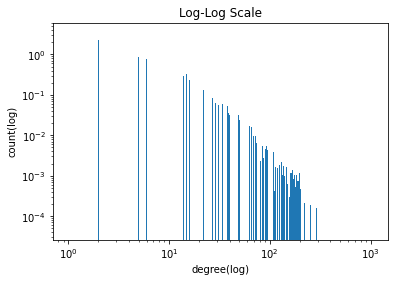

In [8]:
result = find_bin_arg.log(g_facebook, 2)

g_facebook_bins = result[0]
sort_facebook_k = result[1]
num_sort_facebook_k = result[2]
num_bar_facebook_hist = result[3]

print('the kinds of k...   ', end='')
print(*sort_facebook_k[:5], sep=", ", end = '')
print('...', end='')
print(*sort_facebook_k[-5:], sep=", ")
print('the num of kinds of k...', num_sort_facebook_k)
print('the num of bar in the histogram...', num_bar_facebook_hist)

_ = plt.hist(g_facebook_k_list, bins=g_facebook_bins, density = True)

plt.title('Log-Log Scale')

plt.xscale('log')
plt.yscale('log')

plt.xlabel('degree(log)')
plt.ylabel('count(log)')

print ('-------- Bin info ---------')
print ('the number of bins :', len(g_facebook_bins)-1)
print (*_[1][:5], sep = ', ', end ='')
print ('...')


# ============== APPENDIX ===============

#### Karate Test : lin-lin Scale with Bins = 17

the kinds of k...   1, 2, 3...12, 16, 17
the num of kinds of k... 11
the num of bar in the histogram... 11
-------- Bin info ---------
the number of bins : 17
1.0, 1.9411764705882353, 2.8823529411764706, 3.8235294117647056, 4.764705882352941...


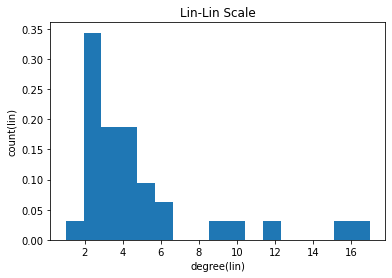

In [9]:
result = find_bin_arg.lin(g_karate, 2)

g_karate_bins = result[0]
sort_karate_k = result[1]
num_sort_karate_k = result[2]
num_bar_karate_hist = result[3]

print('the kinds of k...   ', end='')
print(*sort_karate_k[:3], sep=", ", end = '')
print('...', end='')
print(*sort_karate_k[-3:], sep=", ")
print('the num of kinds of k...', num_sort_karate_k)
print('the num of bar in the histogram...', num_bar_karate_hist)

_ = plt.hist(g_karate_k_list, bins=g_karate_bins, density = True)

plt.title('Lin-Lin Scale')

plt.xlabel('degree(lin)')
plt.ylabel('count(lin)')

print ('-------- Bin info ---------')
print ('the number of bins :', g_karate_bins)
print (*_[1][:5], sep = ', ', end ='')
print ('...')


#### Karate Test : lin-log scale with bins =  17 

the kinds of k...   1, 2, 3...12, 16, 17
the num of kinds of k... 11
the num of bar in the histogram... 11
-------- Bin info ---------
the number of bins : 17
1.0, 1.9411764705882353, 2.8823529411764706, 3.8235294117647056, 4.764705882352941...


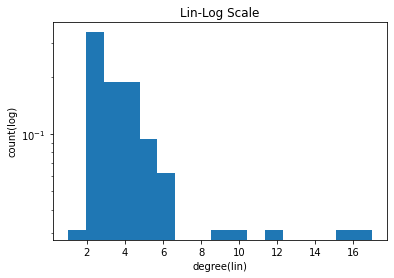

In [10]:
result = find_bin_arg.lin(g_karate, 2)

g_karate_bins = result[0]
sort_karate_k = result[1]
num_sort_karate_k = result[2]
num_bar_karate_hist = result[3]

print('the kinds of k...   ', end='')
print(*sort_karate_k[:3], sep=", ", end = '')
print('...', end='')
print(*sort_karate_k[-3:], sep=", ")
print('the num of kinds of k...', num_sort_karate_k)
print('the num of bar in the histogram...', num_bar_karate_hist)

_ = plt.hist(g_karate_k_list, bins=g_karate_bins, density = True)

plt.title('Lin-Log Scale')

plt.xlabel('degree(lin)')
plt.ylabel('count(log)')

plt.yscale('log')

print ('-------- Bin info ---------')
print ('the number of bins :', g_karate_bins)
print (*_[1][:5], sep = ', ', end ='')
print ('...')


#### NetSci lin-lin Scale with Bins = 33

the kinds of k...   1, 2, 3, 4, 5...19, 20, 21, 27, 34
the num of kinds of k... 22
the num of bar in the histogram... 22
-------- Bin info ---------
the number of bins : 33
1.0, 2.0, 3.0, 4.0, 5.0...


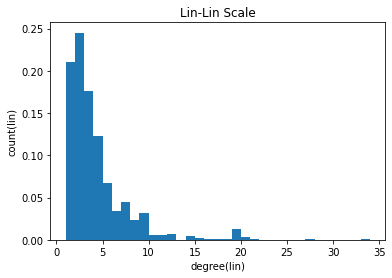

In [11]:
result = find_bin_arg.lin(g_netsci, 2)

g_netsci_bins = result[0]
sort_netsci_k = result[1]
num_sort_netsci_k = result[2]
num_bar_netsci_hist = result[3]

print('the kinds of k...   ', end='')
print(*sort_netsci_k[:5], sep=", ", end = '')
print('...', end='')
print(*sort_netsci_k[-5:], sep=", ")
print('the num of kinds of k...', num_sort_netsci_k)
print('the num of bar in the histogram...', num_bar_netsci_hist)

_ = plt.hist(g_netsci_k_list, bins=g_netsci_bins, density = True)

plt.title('Lin-Lin Scale')

plt.xlabel('degree(lin)')
plt.ylabel('count(lin)')

print ('-------- Bin info ---------')
print ('the number of bins :', g_netsci_bins)
print (*_[1][:5], sep = ', ', end ='')
print ('...')


#### NetSci lin-log scale with bins =  33

the kinds of k...   1, 2, 3, 4, 5...19, 20, 21, 27, 34
the num of kinds of k... 22
the num of bar in the histogram... 22
-------- Bin info ---------
the number of bins : 33
1.0, 2.0, 3.0, 4.0, 5.0...


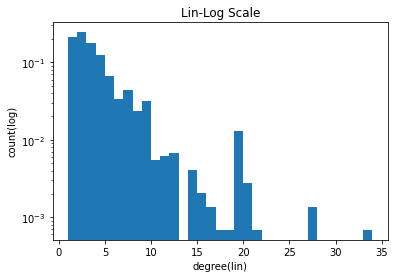

In [12]:
result = find_bin_arg.lin(g_netsci, 2)

g_netsci_bins = result[0]
sort_netsci_k = result[1]
num_sort_netsci_k = result[2]
num_bar_netsci_hist = result[3]

print('the kinds of k...   ', end='')
print(*sort_netsci_k[:5], sep=", ", end = '')
print('...', end='')
print(*sort_netsci_k[-5:], sep=", ")
print('the num of kinds of k...', num_sort_netsci_k)
print('the num of bar in the histogram...', num_bar_netsci_hist)

_ = plt.hist(g_netsci_k_list, bins=g_netsci_bins, density = True)

plt.title('Lin-Log Scale')
plt.xlabel('degree(lin)')
plt.ylabel('count(log)')

plt.yscale('log')

print ('-------- Bin info ---------')
print ('the number of bins :', g_netsci_bins)
print (*_[1][:5], sep = ', ', end ='')
print ('...')


#### Facebook Test : lin-lin Scale with Bins = 1044

the kinds of k...   1, 2, 3, 4, 5...53, 792, 291, 294, 347
the num of kinds of k... 227
the num of bar in the histogram... 227
-------- Bin info ---------
the number of bins : 1044
1.0, 2.0, 3.0, 4.0, 5.0...


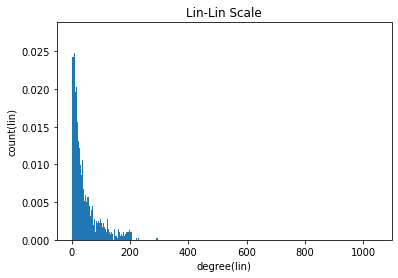

In [13]:
result = find_bin_arg.lin(g_facebook, 2)

g_facebook_bins = result[0]
sort_facebook_k = result[1]
num_sort_facebook_k = result[2]
num_bar_facebook_hist = result[3]

print('the kinds of k...   ', end='')
print(*sort_facebook_k[:5], sep=", ", end = '')
print('...', end='')
print(*sort_facebook_k[-5:], sep=", ")
print('the num of kinds of k...', num_sort_facebook_k)
print('the num of bar in the histogram...', num_bar_facebook_hist)

_ = plt.hist(g_facebook_k_list, bins=g_facebook_bins, density = True)

plt.title('Lin-Lin Scale')
plt.xlabel('degree(lin)')
plt.ylabel('count(lin)')

print ('-------- Bin info ---------')
print ('the number of bins :', g_facebook_bins)
print (*_[1][:5], sep = ', ', end ='')
print ('...')


#### Facebook Test: lin-log scale with bins =  1044

the kinds of k...   1, 2, 3, 4, 5...53, 792, 291, 294, 347
the num of kinds of k... 227
the num of bar in the histogram... 227
-------- Bin info ---------
the number of bins : 1044
1.0, 2.0, 3.0, 4.0, 5.0...


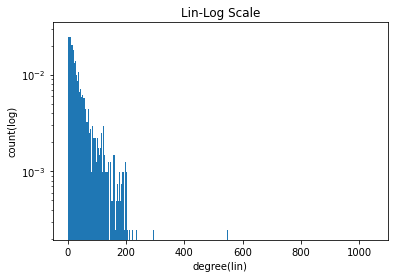

In [14]:
result = find_bin_arg.lin(g_facebook, 2)

g_facebook_bins = result[0]
sort_facebook_k = result[1]
num_sort_facebook_k = result[2]
num_bar_facebook_hist = result[3]

print('the kinds of k...   ', end='')
print(*sort_facebook_k[:5], sep=", ", end = '')
print('...', end='')
print(*sort_facebook_k[-5:], sep=", ")
print('the num of kinds of k...', num_sort_facebook_k)
print('the num of bar in the histogram...', num_bar_facebook_hist)

_ = plt.hist(g_facebook_k_list, bins=g_facebook_bins, density = True)

plt.title('Lin-Log Scale')
plt.xlabel('degree(lin)')
plt.ylabel('count(log)')

plt.yscale('log')

print ('-------- Bin info ---------')
print ('the number of bins :', g_facebook_bins)
print (*_[1][:5], sep = ', ', end ='')
print ('...')
